<a href="https://colab.research.google.com/github/ThoaaPhann/AI_CUOIKY/blob/main/AI_CUOIKY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
from os import listdir
from numpy import asarray, save
from numpy import asarray
from keras.utils import load_img
from keras.utils import img_to_array
from keras.utils import to_categorical #one hot encoding
from sklearn.model_selection import train_test_split
from keras.datasets import cifar100
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization
from keras.models import Sequential, Model
from keras import Input
from keras.layers import LeakyReLU
from keras.optimizers import Adam

In [9]:
folder = '/content/drive/MyDrive/20146076/DATA/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('CLOWNFISH'):
    output = 0
  if file.startswith('CRAB'):
    output = 1
  if file.startswith('JELLYFISH'):
    output = 2
  if file.startswith('OTTER'):
    output = 3
  if file.startswith('PELICAN'):
    output = 4
  if file.startswith('PENGUIN'):
    output = 5
  if file.startswith('SEA_TURTLE'):
    output = 6
  if file.startswith('SHRIMP'):
    output = 7
  if file.startswith('STARFISH'):
    output = 8
  if file.startswith('WHALE'):
    output = 9
  photo = load_img(folder + file, target_size=(100, 100))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/20146076/TRAIN_DATA/SEAANIMAL_PHOTOS', photos)
save('/content/drive/MyDrive/20146076/TRAIN_DATA/SEAANIMAL_LABELS', labels)

(9576, 100, 100, 3) (9576,)


In [10]:
# Load images and labels
photos = np.load('/content/drive/MyDrive/20146076/TRAIN_DATA/SEAANIMAL_PHOTOS.npy')
labels = np.load('/content/drive/MyDrive/20146076/TRAIN_DATA/SEAANIMAL_LABELS.npy')
labels_one_hot = to_categorical(labels)
x_train, x_test, y_train, y_test = train_test_split(photos, labels_one_hot, test_size = 0.2, random_state = 128)

In [11]:
model = Sequential()
#Convolutional
model.add(Conv2D(8, kernel_size= (3,3), activation= 'relu', input_shape = (100,100,3), padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(16, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(32, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(32, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

# Fully connected layers
model.add(Flatten())
model.add(Dense(512, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation= 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer = Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 100, 100, 8)       224       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 50, 50, 8)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 50, 50, 16)        1168      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 25, 25, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 25, 25, 32)        4640      
                                                                 
 conv2d_9 (Conv2D)           (None, 25, 25, 32)       

In [12]:
from keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.2,
    rescale=1./255,
	width_shift_range=0.2,
    height_shift_range=0.2,
	horizontal_flip=True,
    brightness_range=[0.2,1.5], fill_mode="nearest")

In [13]:
train = model.fit_generator(aug.flow(x_train, y_train, batch_size=256),
                               epochs=200,
                               validation_data=aug.flow(x_test,y_test,
                               batch_size=len(x_test)))

<ipython-input-13-7526d5a57f92>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  train = model.fit_generator(aug.flow(x_train, y_train, batch_size=256),


Epoch 1/200
30/30 [==============================] - 36s 1s/step - loss: 1.8786 - accuracy: 0.2990 - val_loss: 1.4594 - val_accuracy: 0.4535
Epoch 2/200
30/30 [==============================] - 29s 972ms/step - loss: 1.4566 - accuracy: 0.4621 - val_loss: 1.2798 - val_accuracy: 0.5183
Epoch 3/200
30/30 [==============================] - 29s 969ms/step - loss: 1.3073 - accuracy: 0.5381 - val_loss: 1.1856 - val_accuracy: 0.5835
Epoch 4/200
30/30 [==============================] - 34s 1s/step - loss: 1.2413 - accuracy: 0.5554 - val_loss: 1.1412 - val_accuracy: 0.5950
Epoch 5/200
30/30 [==============================] - 29s 969ms/step - loss: 1.1954 - accuracy: 0.5871 - val_loss: 1.0681 - val_accuracy: 0.6279
Epoch 6/200
30/30 [==============================] - 29s 963ms/step - loss: 1.1321 - accuracy: 0.6027 - val_loss: 1.0057 - val_accuracy: 0.6508
Epoch 7/200
30/30 [==============================] - 28s 953ms/step - loss: 1.0794 - accuracy: 0.6272 - val_loss: 0.9735 - val_accuracy: 0.656

In [22]:
#Đoạn code này đánh giá độ chính xác của mô hình
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

60/60 [==============================] - 0s 5ms/step - loss: 58.4205 - accuracy: 0.8967
Test accuracy: 0.8966597318649292


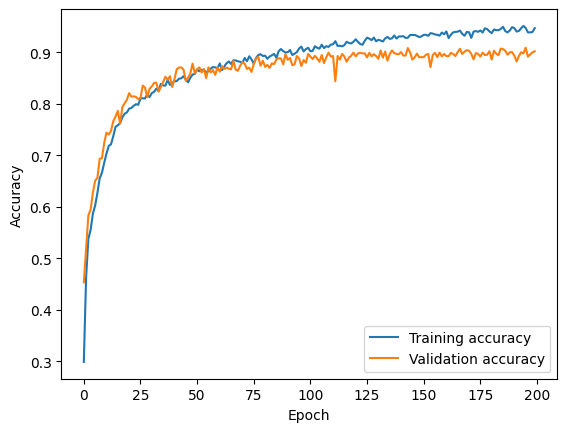

In [20]:
# plot the training and validation accuracy over epochs
import matplotlib.pyplot as plt
plt.plot(train.history['accuracy'], label='Training accuracy')
plt.plot(train.history['val_accuracy'], label = 'Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
#Save model
model.save('/content/drive/MyDrive/20146076/model_seaanimal.h5')